In [1]:
from urllib.request import urlretrieve
import pandas as pd

In [2]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [3]:
# view no of rows and columns in dataframe
covid_df.shape

(248, 4)

In [4]:
# view basic info of dataframe (column_names, non_null_count, data_type)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [5]:
# view basic statistics info of each numerical column
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [6]:
# retriving data from dataframe using indexing
covid_df['date']

# or
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [7]:
# get subset of dataframe using indexing
covid_df[['date','new_cases']]

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [8]:
# get full copy of dataframe rather than refrence
covid_df_copy = covid_df.copy()

In [9]:
# retrive rows use loc/iloc using indexing
covid_df_copy.loc[5]

date          2020-01-05
new_cases              0
new_deaths             0
new_tests            NaN
Name: 5, dtype: object

In [10]:
# get first set of rows
covid_df_copy.head(10)

# get last set of rows
covid_df_copy.tail(10)

,date,new_cases,new_deaths,new_tests
238,2020-08-25,953.0,4.0,45798.0
239,2020-08-26,876.0,4.0,58054.0
240,2020-08-27,1366.0,13.0,57640.0
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [11]:
# using at to retrive specific data
covid_df_copy.at[0, 'new_tests']

#or
covid_df_copy['new_tests'][0]

nan

In [12]:
# find first non empty index in a series
covid_df.new_tests.first_valid_index()

# 111 means first valid value is at row 111 of new_tests column
covid_df.loc[105: 115]

,date,new_cases,new_deaths,new_tests
105,2020-04-14,3153.0,564.0,NaN
106,2020-04-15,2972.0,604.0,NaN
107,2020-04-16,2667.0,578.0,NaN
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0


In [13]:
# taking random set of data for sampling to get visual understanding of data
covid_df.sample(20)

,date,new_cases,new_deaths,new_tests
85,2020-03-25,5249.0,743.0,NaN
242,2020-08-29,1460.0,9.0,64294.0
145,2020-05-24,669.0,119.0,34206.0
210,2020-07-28,168.0,5.0,25341.0
58,2020-02-27,78.0,1.0,NaN
151,2020-05-30,516.0,87.0,36051.0
114,2020-04-23,3370.0,437.0,37083.0
190,2020-07-08,137.0,30.0,28679.0
191,2020-07-09,193.0,15.0,29947.0
102,2020-04-11,3951.0,570.0,NaN


## Simple Analyzing Data From DataFrame

In [14]:
# get total no of covid infected cases
total_cases = covid_df_copy.new_cases.sum()
total_cases

271515.0

In [15]:
# get total no of deaths due to covid
total_deaths = covid_df_copy.new_deaths.sum()
total_deaths

35497.0

In [16]:
# get ratio of total_cases vs total_deaths
death_rate = round(total_deaths/total_cases *100, 2)
death_rate

13.07

In [17]:
# get positive result ratio
total_tests = covid_df_copy.new_tests.sum()
positive_rate = round(total_cases/total_tests, 2)
positive_rate

0.06

## Quering And Sorting Rows

In [18]:
# get new boolean series using comparision
high_new_cases = covid_df_copy.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [19]:
# filter out high cases using boolean series, filters out from dataframe using truth values
covid_df_copy[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [20]:
# compute in single operation
high_cases_df = covid_df_copy[covid_df_copy.new_cases > 1000]
high_cases_df.head()

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN


In [21]:
# viewing all rows and columns in dataframe
from IPython.display import display
with pd.option_context('display.max_rows', 300):
    display(covid_df)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [22]:
# calculate high ratio of positive cases 
high_ratio_df = covid_df_copy[covid_df.new_cases/covid_df.new_tests > positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0
125,2020-05-04,1389.0,174.0,22999.0


In [23]:
# performing computation between attributes results new series
covid_df_copy['positive_rate'] = covid_df.new_cases / covid_df.new_tests
covid_df_copy

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [24]:
# removing attributes from dataframe inplace
covid_df_copy.drop(columns='positive_rate', inplace=True)

In [25]:
covid_df_copy.head(2)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN


## Sorting Rows Using Column Values

In [26]:
# sorting by using specific column using .sort_values
covid_df_copy.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [27]:
# sorting 
covid_df_copy.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [28]:
# sorting
covid_df_copy.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [29]:
covid_df_copy[170:175]

,date,new_cases,new_deaths,new_tests
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0


```
measures to fill invalid data using
1) Replace it with 0
2) Replace it with average of entire column
3) Replace it with the average of the values on the previous & next date
4) Discard the row entirely
```

In [30]:
# filling the corrupted data with correct measures (in this case, replacing it with the average of the values around it)
covid_df_copy.at[172, 'new_cases'] = (covid_df_copy.at[171, 'new_cases'] + covid_df_copy.at[173, 'new_cases'])/2
covid_df_copy[170:175]

,date,new_cases,new_deaths,new_tests
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0


## Working With Dates

In [31]:
# convert dtype: object to datetime format 
covid_df_copy['date'] = pd.to_datetime(covid_df['date'])

In [32]:
covid_df_copy['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [33]:
# extract different attributes from datetime object and add to different column in dataframe
covid_df_copy['year'] = pd.DatetimeIndex(covid_df_copy['date']).year
covid_df_copy['month'] = pd.DatetimeIndex(covid_df_copy['date']).month
covid_df_copy['day'] = pd.DatetimeIndex(covid_df_copy['date']).day
covid_df_copy['weekday'] = pd.DatetimeIndex(covid_df_copy['date']).weekday

In [34]:
covid_df_copy.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5


In [35]:
# get sum of columns
covid_df_may = covid_df_copy[covid_df_copy.month == 5]
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_df_may_totals = covid_df_may_metrics.sum()
covid_df_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [36]:
# oneliner sum
covid_df_may_totals = covid_df_copy[covid_df_copy.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()
covid_df_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [37]:
# oneliner average
covid_df_may_avgs = covid_df_copy[covid_df_copy.month == 5][['new_cases', 'new_deaths', 'new_tests']].mean()
covid_df_may_avgs

new_cases       937.838710
new_deaths      182.516129
new_tests     34797.419355
dtype: float64

## Aggregation and Grouping

In [51]:
monthly_groups = covid_df_copy.groupby('month')
monthly_groups[['new_cases','new_deaths', 'new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [53]:
# Aggregration by mean
monthly_avg = covid_df_copy.groupby('weekday')
monthly_avg[['new_cases', 'new_deaths', 'new_tests']].mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [55]:
# calculating the running or the cummulative sum of cases, tests or death upto the current date for each row
# cumsum --> cummulative sum for the dataframe
covid_df_copy['total_cases'] = covid_df_copy.new_cases.cumsum()
covid_df_copy['total_deaths'] = covid_df_copy.new_deaths.cumsum()
covid_df_copy['total_tests'] = covid_df_copy.new_tests.cumsum()

## Merging Data From Multiple Sources

In [58]:
# download new sets of date
!wget 'https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv'

--2020-09-10 08:01:17--  https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv
Resolving hub.jovian.ml (hub.jovian.ml)... 3.6.50.59
Connecting to hub.jovian.ml (hub.jovian.ml)|3.6.50.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10197 (10.0K) [application/octet-stream]
Saving to: ‘locations.csv’

locations.csv       100%[===================>]   9.96K  --.-KB/s    in 0s      

2020-09-10 08:01:18 (75.4 MB/s) - ‘locations.csv’ saved [10197/10197]



In [59]:
locations_df = pd.read_csv('locations.csv')

In [65]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [66]:
covid_df_copy['location'] = "Italy"

In [67]:
covid_df_copy.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy


In [68]:
merged_df = covid_df_copy.merge(locations_df, on="location")

In [69]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [70]:
# per million calculations
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [71]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


## Writing Back Data To File 

In [74]:
result_df = merged_df[['date',
                      'new_cases',
                      'total_cases',
                      'new_deaths',
                      'total_tests',
                      'total_deaths',
                      'cases_per_million',
                      'deaths_per_million',
                      'tests_per_million']]

In [75]:
result_df

,date,new_cases,total_cases,new_deaths,total_tests,total_deaths,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,4182478.0,35473.0,4420.946386,586.700753,69175.513516
244,2020-08-31,1365.0,268663.5,4.0,4225061.0,35477.0,4443.522614,586.766910,69879.809125
245,2020-09-01,996.0,269659.5,6.0,4279456.0,35483.0,4459.995818,586.866146,70779.467667
246,2020-09-02,975.0,270634.5,8.0,NaN,35491.0,4476.121695,586.998461,NaN


In [76]:
result_df.to_csv('results.csv', index=None)

In [77]:
!ls

analyze_tabulardata_with_pandas.ipynb  python-practice-assignment.ipynb
italy-covid-daywise.csv		       README.md
locations.csv			       results.csv


In [78]:
results_df = pd.read_csv('results.csv')

In [79]:
results_df

,date,new_cases,total_cases,new_deaths,total_tests,total_deaths,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,NaN,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,4182478.0,35473.0,4420.946386,586.700753,69175.513516
244,2020-08-31,1365.0,268663.5,4.0,4225061.0,35477.0,4443.522614,586.766910,69879.809125
245,2020-09-01,996.0,269659.5,6.0,4279456.0,35483.0,4459.995818,586.866146,70779.467667
246,2020-09-02,975.0,270634.5,8.0,NaN,35491.0,4476.121695,586.998461,NaN


## Basic Data Plotting With Pandas 

     |████████████████████████████████| 11.6 MB 339 kB/s eta 0:00:01    |████████████████████            | 7.2 MB 494 kB/s eta 0:00:09     |██████████████████████▋         | 8.2 MB 586 kB/s eta 0:00:06     |███████████████████████████▍    | 9.9 MB 624 kB/s eta 0:00:03     |█████████████████████████████▌  | 10.7 MB 672 kB/s eta 0:00:02
  Using cached Pillow-7.2.0-cp38-cp38-manylinux1_x86_64.whl (2.2 MB)
     |████████████████████████████████| 92 kB 93 kB/s  eta 0:00:011


<AxesSubplot:>

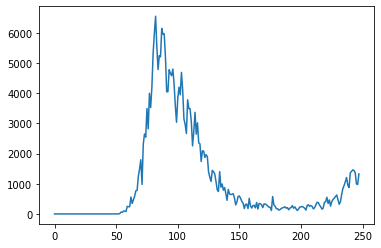

In [87]:
!pip install matplotlib


In [88]:
# set date as index for whole dataframe
result_df.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

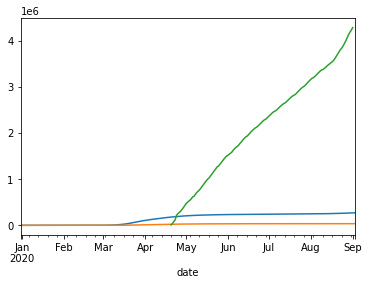

In [96]:
result_df.total_cases.plot()
result_df.total_deaths.plot()
result_df.total_tests.plot()

In [97]:
death_rate = result_df.total_deaths / result_df.total_cases

<AxesSubplot:title={'center':'Death Rate'}, xlabel='date'>

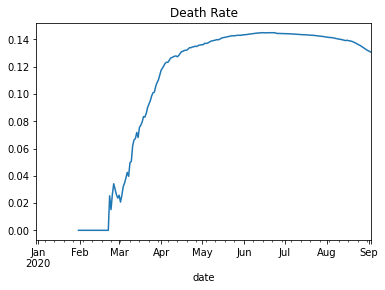

In [98]:
death_rate.plot(title='Death Rate')

In [99]:
positive_rate = result_df.total_cases / result_df.total_tests

<AxesSubplot:title={'center':'Positive Rate'}, xlabel='date'>

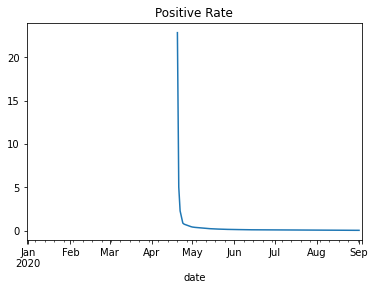

In [100]:
positive_rate.plot(title='Positive Rate')

In [102]:
monthly_avg

In [114]:
covid_df_month = covid_df_copy.groupby('month')[['new_deaths', 'new_cases', 'new_tests']].sum()

<AxesSubplot:title={'center':'New Cases'}, xlabel='month'>

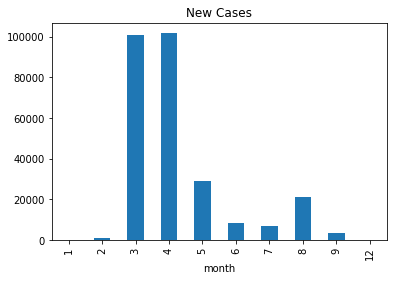

In [117]:
covid_df_month.new_cases.plot(kind='bar', title='New Cases')